In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [24]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [25]:
# reflect an existing database into a new model
Base = automap_base()

In [26]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [27]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [36]:
# Find the most recent date in the data set.
recentdate = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recentdate)

('2017-08-23',)


In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. Calculate the date one year from the last date in data set.

#so we know from above that the latest date is 8/23/2017, so one year before that is 8/23/2016. use that below


# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column and Sort the dataframe by date
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date','Precipitation'])
precipitation_df = precipitation_df.dropna(how='any') 
precipitation_df = precipitation_df.sort_values(["Date"], ascending=True)
precipitation_df = precipitation_df.set_index("Date")
precipitation_df.head()






,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


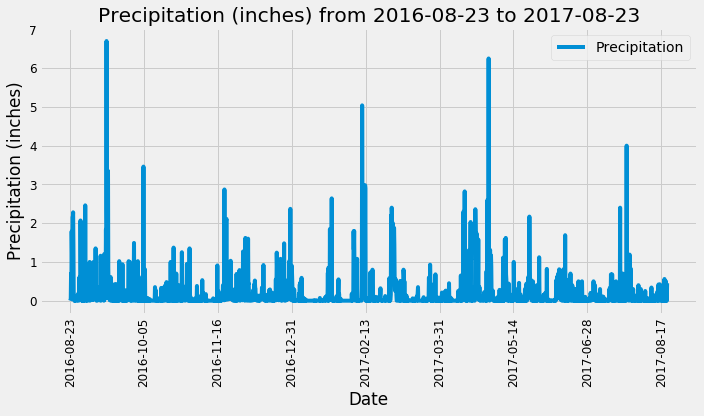

In [44]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize=(10,6), fontsize=12, rot=90)
plt.title(f"Precipitation (inches) from 2016-08-23 to 2017-08-23")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")

plt.tight_layout()

plt.show()

In [45]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number stations in the dataset
totalstations = session.query(func.count(station.station)).all()
print(totalstations)

[(9,)]


In [47]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
mostactive = session.query(measurement.station, func.count(measurement.station)).\
                  order_by(func.count(measurement.station).desc()).\
                  group_by(measurement.station).\
                  all()
mostactive

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#most active station
mostactive_station = mostactive[0][0]
print (f"The most active station is {mostactive_station}.")

#lowest temp recorded at the most active station
lowest_temp = session.query(func.min(measurement.tobs)).\
              filter(measurement.station == mostactive_station).scalar()
              
print(f"Lowest temperature: {lowest_temp} degrees Fahrenheit.")

#highest temp recorded at the most active station
highest_temp = session.query(func.max(measurement.tobs)).\
              filter(measurement.station == mostactive_station).scalar()

print(f"Highest temperature: {highest_temp} degrees Fahrenheit.")

# average temp recorded at the most active station
avg_temp = session.query(func.avg(measurement.tobs)).\
              filter(measurement.station == mostactive_station).scalar()

print(f"Average temperature: {round(avg_temp, 2)} degrees Fahrenheit.")

The most active station is USC00519281.
Lowest temperature: 54.0 degrees Fahrenheit.
Highest temperature: 85.0 degrees Fahrenheit.
Average temperature: 71.66 degrees Fahrenheit.


In [52]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
mostactive_temp = session.query(measurement.tobs).\
    filter(measurement.date<='2017-08-23').filter(measurement.date>='2016-08-23').\
    filter(measurement.station == mostactive[0][0]).all()


In [53]:
mostactive_temp_df = pd.DataFrame(mostactive_temp)
mostactive_temp_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


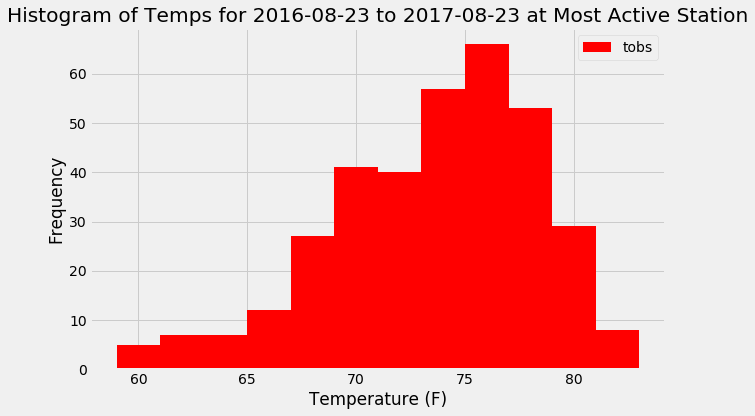

In [55]:
mostactive_temp_df.plot(kind="hist", color="red", bins=12, figsize=(10, 6))
plt.title(
    f"Histogram of Temps for 2016-08-23 to 2017-08-23 at Most Active Station"
)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.tight_layout()

plt.show()


# Close session

In [56]:
# Close Session
session.close()